In [1]:
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install mpl_toolkits


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for mpl_toolkits


Fitted 5th-degree polynomial: 
f(x) = -0.001 * x^5 + -0.073 * x^4 + -0.054 * x^3 + 6.323 * x^2 + 11.315 * x^1 + 4.291 * x^0
Mean Squared Error (MSE) of fitted polynomial: 6028.19710663822
Median Squared Error (MedSE) of fitted polynomial: 651.0021373433062


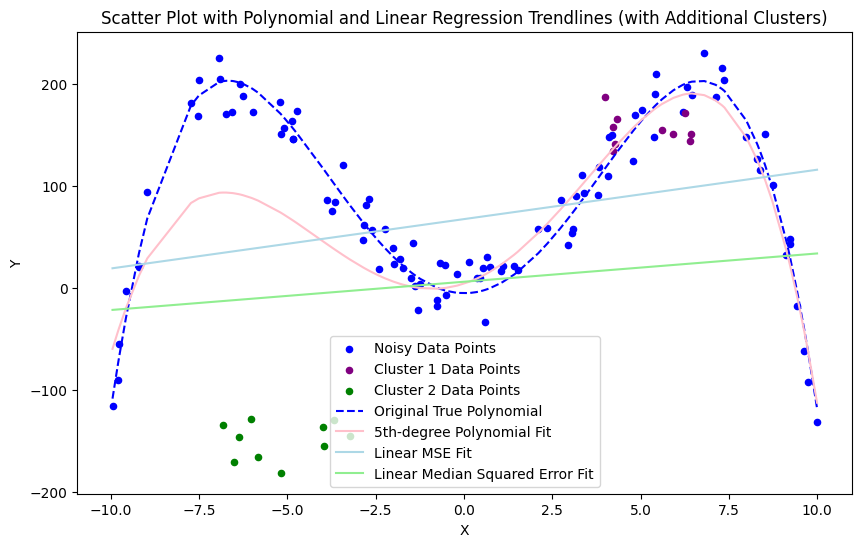

Original random 5th-degree polynomial coefficients:
 [-5.195  0.     9.359  0.    -0.105  0.   ]
Polynomial function: f(x) =  -0.105*x^4 + 9.359*x^2 + -5.195*x^0
Fitted 5th-degree polynomial coefficients:
 ['-0.001', '-0.073', '-0.054', '6.323', '11.315', '4.291']

Linear MSE Regression coefficients (slope and intercept):
Slope: 4.8461721023868956
Intercept: 67.58832344536287

Linear Median Squared Error Regression coefficients (slope and intercept):
Slope: 2.7754547006261947
Intercept: 6.126588525023602


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Set the random seed for reproducibility (optional)
np.random.seed()  # You can insert your own seed for reproducibility

# Generate random coefficients for a 5th-degree polynomial with only three non-zero coefficients
coefficients = np.zeros(6)
non_zero_indices = np.random.choice(range(6), 3, replace=False)  # Randomly pick 3 indices to be non-zero
for idx in non_zero_indices:
    coefficients[idx] = np.round(np.random.uniform(-10, 10), 3)  # Limit each coefficient to 3 decimal places

# Define the original polynomial function
def original_polynomial(x):
    return sum(coefficients[i] * x**i for i in range(6))

# Generate initial random X values within the range -10 to 10
X = np.random.uniform(-10, 10, 100)
Y = np.array([original_polynomial(x) for x in X])

# Calculate maximum absolute value of Y for scaling noise
y_range = np.max(Y) - np.min(Y)
x_range = 20  # Range of X values (-10 to 10)
noise_scale_y = 0.1 * y_range  # 10% of the Y range for Y noise
noise_scale_x = 0.1 * x_range  # 10% of the X range for X noise

# Add uniform noise to Y values
noise = np.random.uniform(-noise_scale_y, noise_scale_y, size=Y.shape)
Y_noisy = Y + noise

# Generate additional clusters of random data points centered within a specific region
# Cluster 1: centered around X=5, Y=10, with 10% spread in both X and Y
X_cluster1_center, Y_cluster1_center = 5, noise_scale_y*5
X_cluster1 = np.random.uniform(X_cluster1_center - noise_scale_x, X_cluster1_center + noise_scale_x, 10)
Y_cluster1 = np.random.uniform(Y_cluster1_center - noise_scale_y, Y_cluster1_center + noise_scale_y, 10)

# Cluster 2: centered around X=-5, Y=-10, with 10% spread in both X and Y
X_cluster2_center, Y_cluster2_center = -5, -noise_scale_y*5
X_cluster2 = np.random.uniform(X_cluster2_center - noise_scale_x, X_cluster2_center + noise_scale_x, 10)
Y_cluster2 = np.random.uniform(Y_cluster2_center - noise_scale_y, Y_cluster2_center + noise_scale_y, 10)

# Combine all X and Y data points
X_combined = np.concatenate([X, X_cluster1, X_cluster2])
Y_combined = np.concatenate([Y_noisy, Y_cluster1, Y_cluster2])

# Fit a 5th-degree polynomial to the combined noisy data
poly_fit = np.polyfit(X_combined, Y_combined, 5)
poly_fit_fn = np.poly1d(poly_fit)  # Convert to a polynomial function for easy evaluation

# Print the polynomial as text with largest degrees first
poly_text = " + ".join([f"{coef:.3f} * x^{5 - i}" for i, coef in enumerate(poly_fit)])
print(f"Fitted 5th-degree polynomial: \nf(x) = {poly_text}")

# Calculate the MSE for the fitted polynomial
Y_pred_poly = poly_fit_fn(X_combined)
mse_poly = np.mean((Y_combined - Y_pred_poly) ** 2)
print(f"Mean Squared Error (MSE) of fitted polynomial: {mse_poly}")

# Calculate the Median Squared Error (MedSE) for the fitted polynomial
medse_poly = np.median((Y_combined - Y_pred_poly) ** 2)
print(f"Median Squared Error (MedSE) of fitted polynomial: {medse_poly}")

# Fit the linear regression using Mean Squared Error (MSE)
slope_mse, intercept_mse = np.polyfit(X_combined, Y_combined, 1)

# Define the function for Median Squared Error (MSE)
def median_squared_error(params, X, Y):
    slope, intercept = params
    Y_pred = slope * X + intercept
    return np.median((Y - Y_pred) ** 2)

# Fit the linear regression using Median Squared Error
initial_guess = [0, 0]
result_median = minimize(median_squared_error, initial_guess, args=(X_combined, Y_combined))
slope_median, intercept_median = result_median.x

# Define functions for each fitted line
def mse_line(x):
    return slope_mse * x + intercept_mse

def median_line(x):
    return slope_median * x + intercept_median

# Plot settings
plt.figure(figsize=(10, 6))  # Increase figure size
plt.scatter(X, Y_noisy, color="blue", s=20, label="Noisy Data Points")  # Original noisy data points
plt.scatter(X_cluster1, Y_cluster1, color="purple", s=20, label="Cluster 1 Data Points")
plt.scatter(X_cluster2, Y_cluster2, color="green", s=20, label="Cluster 2 Data Points")

# Plot the original "true" polynomial function used to generate the data
plt.plot(np.sort(X_combined), original_polynomial(np.sort(X_combined)), color="blue", linestyle="--", label="Original True Polynomial")

# Plot fitted polynomial and linear regression lines
plt.plot(np.sort(X_combined), poly_fit_fn(np.sort(X_combined)), color="pink", label="5th-degree Polynomial Fit")  # Polynomial trendline
plt.plot(np.sort(X_combined), mse_line(np.sort(X_combined)), color="lightblue", label="Linear MSE Fit")  # Linear MSE trendline
plt.plot(np.sort(X_combined), median_line(np.sort(X_combined)), color="lightgreen", label="Linear Median Squared Error Fit")  # Linear Median trendline

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot with Polynomial and Linear Regression Trendlines (with Additional Clusters)")
plt.legend()
plt.show()

# Print the polynomial, MSE, and median coefficients for reference
print("Original random 5th-degree polynomial coefficients:\n", coefficients)
print("Polynomial function: f(x) = ", " + ".join([f"{coeff}*x^{i}" for i, coeff in reversed(list(enumerate(coefficients))) if coeff != 0]))
print("Fitted 5th-degree polynomial coefficients:\n", [f"{coef:.3f}" for coef in poly_fit])

# Print the linear regression coefficients for both MSE and Median Squared Error
print("\nLinear MSE Regression coefficients (slope and intercept):")
print("Slope:", slope_mse)
print("Intercept:", intercept_mse)

print("\nLinear Median Squared Error Regression coefficients (slope and intercept):")
print("Slope:", slope_median)
print("Intercept:", intercept_median)


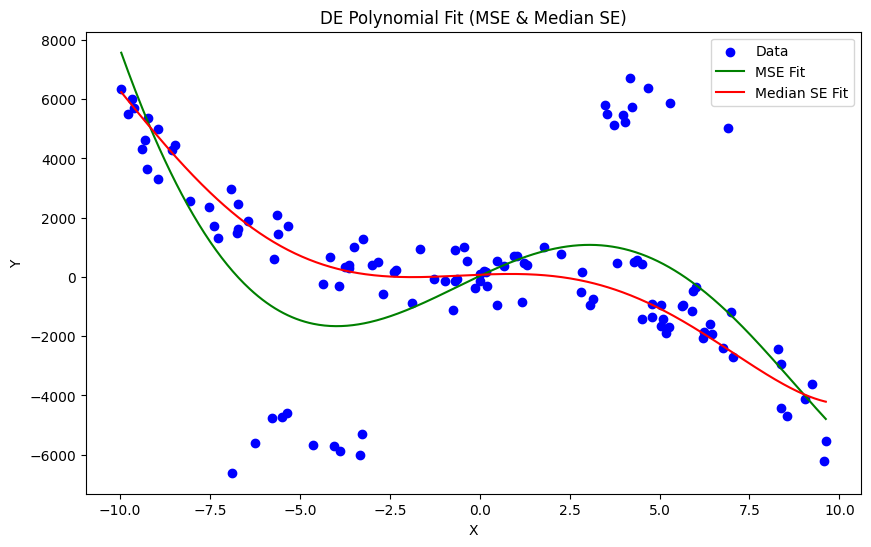

Original random 5th-degree polynomial coefficients:
 [-9.549  7.43   0.    -6.051  0.     0.   ]
Polynomial function: f(x) =  -6.051*x^3 + 7.43*x^1 + -9.549*x^0
Fitted 5th-degree polynomial coefficients:
 ['0.090', '0.353', '-22.258', '-35.322', '725.409', '399.436']


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


np.random.seed()

coefficients = np.zeros(6)
non_zero_indices = np.random.choice(range(6), 3, replace=False)
for idx in non_zero_indices:
    coefficients[idx] = np.round(np.random.uniform(-10, 10), 3)

def original_polynomial(x):
    return sum(coefficients[i] * x**i for i in range(6))

X = np.random.uniform(-10, 10, 100)
Y = np.array([original_polynomial(x) for x in X])


y_range = np.max(Y) - np.min(Y)
x_range = 20
noise_scale_y = 0.1 * y_range
noise_scale_x = 0.1 * x_range

# Add uniform noise to Y values
noise = np.random.uniform(-noise_scale_y, noise_scale_y, size=Y.shape)
Y_noisy = Y + noise

# Generate additional clusters of random data points centered within a specific region
# Cluster 1: centered around X=5, Y=10, with 10% spread in both X and Y
X_cluster1_center, Y_cluster1_center = 5, noise_scale_y*5
X_cluster1 = np.random.uniform(X_cluster1_center - noise_scale_x, X_cluster1_center + noise_scale_x, 10)
Y_cluster1 = np.random.uniform(Y_cluster1_center - noise_scale_y, Y_cluster1_center + noise_scale_y, 10)

# Cluster 2: centered around X=-5, Y=-10, with 10% spread in both X and Y
X_cluster2_center, Y_cluster2_center = -5, -noise_scale_y*5
X_cluster2 = np.random.uniform(X_cluster2_center - noise_scale_x, X_cluster2_center + noise_scale_x, 10)
Y_cluster2 = np.random.uniform(Y_cluster2_center - noise_scale_y, Y_cluster2_center + noise_scale_y, 10)

# Combine all X and Y data points
X_combined = np.concatenate([X, X_cluster1, X_cluster2])
Y_combined = np.concatenate([Y_noisy, Y_cluster1, Y_cluster2])

# Fit a 5th-degree polynomial to the combined noisy data
poly_fit = np.polyfit(X_combined, Y_combined, 5)
poly_fit_fn = np.poly1d(poly_fit)  # Convert to a polynomial function for easy evaluation


# Differential Evolution for Polynomial Fitting
def differential_evolution_polynomial(X, Y, generations=100, population_size=50, mutation_factor=0.8, crossover_rate=0.7, error_type='mse'):
    num_params = 6  # Number of coefficients in the 5th-degree polynomial
    population = np.random.uniform(-10, 10, (population_size, num_params))

    def polynomial(params, x):
        return sum(params[i] * x**i for i in range(num_params))

    def calculate_error(params, X, Y, error_type):
        Y_pred = [polynomial(params, x) for x in X]
        if error_type == 'mse':
            return np.mean((Y - Y_pred) ** 2)
        elif error_type == 'median_se':
            return np.median((Y - Y_pred) ** 2)
        else:
            raise ValueError("Invalid error type. Choose 'mse' or 'median_se'.")

    for _ in range(generations):
        for i in range(population_size):
            # Mutation
            a, b, c = np.random.choice([j for j in range(population_size) if j != i], 3, replace=False)
            mutant = population[a] + mutation_factor * (population[b] - population[c])

            # Crossover
            trial = np.zeros(num_params)
            for j in range(num_params):
                if np.random.rand() < crossover_rate or j == np.random.randint(0, num_params):
                  trial[j] = mutant[j]
                else:
                  trial[j] = population[i][j]

            # Selection
            error_current = calculate_error(population[i], X, Y, error_type)
            error_trial = calculate_error(trial, X, Y, error_type)
            if error_trial < error_current:
                population[i] = trial

    best_params_idx = np.argmin([calculate_error(params, X, Y, error_type) for params in population])
    best_params = population[best_params_idx]
    return best_params

# Perform Differential Evolution using MSE
best_params_mse = differential_evolution_polynomial(X_combined, Y_combined, error_type='mse')

# Perform Differential Evolution using Median Squared Error
best_params_median = differential_evolution_polynomial(X_combined, Y_combined, error_type='median_se')


def plot_polynomial(params,col):
  x_vals = np.linspace(np.min(X_combined), np.max(X_combined), 500)
  y_vals = [sum(params[i] * x**i for i in range(len(params))) for x in x_vals]
  plt.plot(x_vals, y_vals,color=col)

plt.figure(figsize=(10, 6))
plt.scatter(X_combined, Y_combined, color="blue", label="Noisy Data Points")
plot_polynomial(best_params_mse, col="green")
plot_polynomial(best_params_median,col="red")

plt.title("DE Polynomial Fit (MSE & Median SE)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(["Data", "MSE Fit", "Median SE Fit"])
plt.show()


# Print the polynomial, MSE, and median coefficients for reference
print("Original random 5th-degree polynomial coefficients:\n", coefficients)
print("Polynomial function: f(x) = ", " + ".join([f"{coeff}*x^{i}" for i, coeff in reversed(list(enumerate(coefficients))) if coeff != 0]))
print("Fitted 5th-degree polynomial coefficients:\n", [f"{coef:.3f}" for coef in poly_fit])



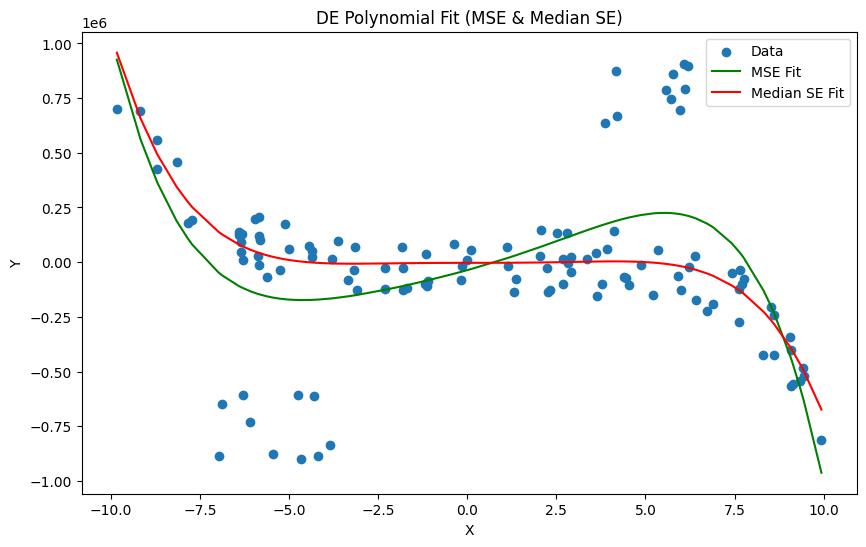

MSE: 91049535722.48639, MedSE: 27394877260.80652
Polynomial Fit Coefficients: [-1.29918497e+01 -2.47663175e+01 -2.15711978e+02  3.12439788e+03
  5.24790059e+04 -5.11256412e+04]
DE - MSE Fit : [-3.63318758e+04  4.53383569e+04  3.04265650e+03  1.53140108e+02
 -2.55407451e+01 -1.62813050e+01]
DE - Median SE Fit : [-3111.39466524   170.33557842  -154.86076695   231.16856078
    19.23659949   -11.05354852]


In [4]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


def generate_data(coefficients):
    X = np.random.uniform(-10, 10, 100)
    Y = np.array([original_polynomial(x) for x in X])

    y_range = np.max(Y) - np.min(Y)
    x_range = 20
    noise_scale_y = 0.1 * y_range
    noise_scale_x = 0.1 * x_range

    noise = np.random.uniform(-noise_scale_y, noise_scale_y, size=Y.shape)
    Y_noisy = Y + noise

    # Generate additional clusters of random data points centered within a specific region
    # Cluster 1: centered around X=5, Y=10, with 10% spread in both X and Y
    X_cluster1_center, Y_cluster1_center = 5, noise_scale_y*5
    X_cluster1 = np.random.uniform(X_cluster1_center - noise_scale_x, X_cluster1_center + noise_scale_x, 10)
    Y_cluster1 = np.random.uniform(Y_cluster1_center - noise_scale_y, Y_cluster1_center + noise_scale_y, 10)

    # Cluster 2: centered around X=-5, Y=-10, with 10% spread in both X and Y
    X_cluster2_center, Y_cluster2_center = -5, -noise_scale_y*5
    X_cluster2 = np.random.uniform(X_cluster2_center - noise_scale_x, X_cluster2_center + noise_scale_x, 10)
    Y_cluster2 = np.random.uniform(Y_cluster2_center - noise_scale_y, Y_cluster2_center + noise_scale_y, 10)

    # Combine all X and Y data points
    X_combined = np.concatenate([X, X_cluster1, X_cluster2])
    Y_combined = np.concatenate([Y_noisy, Y_cluster1, Y_cluster2])

    return X_combined, Y_combined

def fit_polynomial(X, Y, degree):
    poly_fit = np.polyfit(X, Y, degree)
    return np.poly1d(poly_fit), poly_fit

# Define the original polynomial function
def original_polynomial(x):
    return sum(coefficients[i] * x**i for i in range(6))

def calculate_errors(Y_true, Y_pred):
    mse = np.mean((Y_true - Y_pred) ** 2)
    medse = np.median((Y_true - Y_pred) ** 2)
    return mse, medse

def differential_evolution_polynomial(X, Y, generations=100, population_size=50,
                                       mutation_factor=0.8, crossover_rate=0.7, error_type='mse',
                                       bounds=([-10, 10], ) * 6):

    num_params = 6  # Number of coefficients in the 5th-degree polynomial
    population = np.random.uniform(-10, 10, (population_size, num_params))

    def polynomial(params, x):
        return sum(params[i] * x**i for i in range(num_params))

    def calculate_error(params, X, Y, error_type):
        Y_pred = [polynomial(params, x) for x in X]
        if error_type == 'mse':
            return np.mean((Y - Y_pred) ** 2)
        elif error_type == 'median_se':
            return np.median((Y - Y_pred) ** 2)
        else:
            raise ValueError("Invalid error type. Choose 'mse' or 'median_se'.")

    for _ in range(generations):
        for i in range(population_size):
            # Mutation
            a, b, c = np.random.choice([j for j in range(population_size) if j != i], 3, replace=False)
            mutant = population[a] + mutation_factor * (population[b] - population[c])

            # Crossover
            trial = np.zeros(num_params)
            for j in range(num_params):
                if np.random.rand() < crossover_rate or j == np.random.randint(0, num_params):
                  trial[j] = mutant[j]
                else:
                  trial[j] = population[i][j]

            # Selection
            error_current = calculate_error(population[i], X, Y, error_type)
            error_trial = calculate_error(trial, X, Y, error_type)
            if error_trial < error_current:
                population[i] = trial

    best_params_idx = np.argmin([calculate_error(params, X, Y, error_type) for params in population])
    best_params = population[best_params_idx]
    return best_params

# Example usage
coefficients = np.zeros(6)
non_zero_indices = np.random.choice(range(6), 3, replace=False)
for idx in non_zero_indices:
    coefficients[idx] = np.round(np.random.uniform(-10, 10), 3)

X_combined, Y_combined = generate_data(coefficients)
x_sorted = np.sort(X_combined)

poly_fit_fn, poly_fit = fit_polynomial(X_combined, Y_combined, 5)

Y_pred = poly_fit_fn(X_combined)
mse, medse = calculate_errors(Y_combined, Y_pred)

#Differential Evolution fit
best_params_mse = differential_evolution_polynomial(X_combined, Y_combined, error_type='mse')
best_params_median_se = differential_evolution_polynomial(X_combined, Y_combined, error_type='median_se')

#Plotting
plt.figure(figsize=(10,6))
plt.scatter(X_combined, Y_combined)
#plt.plot(x_sorted, poly_fit_fn(x_sorted))
plt.plot(x_sorted, [sum(best_params_mse[i] * x**i for i in range(6)) for x in x_sorted], color= "green")
plt.plot(x_sorted, [sum(best_params_median_se[i] * x**i for i in range(6)) for x in x_sorted], color="red" )
plt.title("DE Polynomial Fit (MSE & Median SE)")
plt.legend(["Data", "MSE Fit", "Median SE Fit"])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


print(f"MSE: {mse}, MedSE: {medse}")
print("Polynomial Fit Coefficients:", poly_fit)
print(f"DE - MSE Fit : {best_params_mse}")
print(f"DE - Median SE Fit : {best_params_median_se}")
